# Credit Risk Modeling using Machine Learning

## Objective
To build a predictive model that estimates the probability of loan default using customer financial and demographic data, helping financial institutions minimize credit risk.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [5]:
df = pd.read_csv(r"C:\Users\tolus\Downloads\dataset.csv")
df.head()


,id,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment(years),Installment rate in percentage of disposable income,personal_status,Other debtors / guarantors,...,Property,Age in years,Other installment plans (banks/stores),Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Status of existing checking account
0,1,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [6]:
df.shape


(1000, 21)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   id                                                        1000 non-null   int64 
 1   Duration in months                                        1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose of the credit                                     1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Status of savings account/bonds                           1000 non-null   object
 6   Present employment(years)                                 1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   personal_status              

In [8]:
df.describe()


,id,Duration in months,Credit amount,Installment rate in percentage of disposable income,Present residence since X years,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,288.819436,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,1.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,250.750000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,500.500000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,750.250000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1000.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [14]:
df["default"] = np.where(
    (df["Credit amount"] > df["Credit amount"].median()) &
    (df["Duration in months"] > df["Duration in months"].median()),
    1,
    0
)


In [15]:
df["default"].value_counts()


default
0    650
1    350
Name: count, dtype: int64

In [16]:
target = "default"


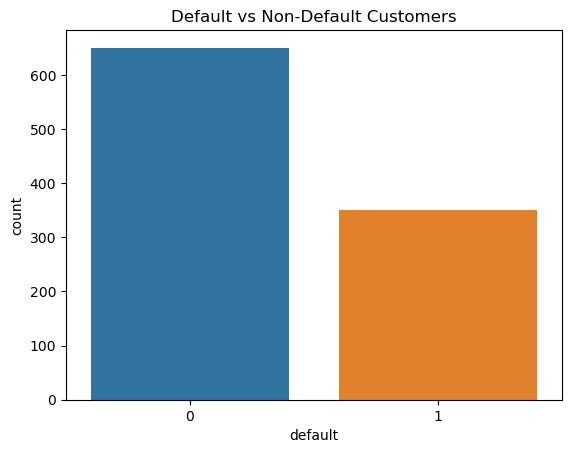

In [17]:
sns.countplot(x=target, data=df)
plt.title("Default vs Non-Default Customers")
plt.show()


In [18]:
df.drop("id", axis=1, inplace=True)


In [19]:
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(exclude="object").columns

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)


Categorical Columns: Index(['Credit history', 'Purpose of the credit',
       'Status of savings account/bonds', 'Present employment(years)',
       'personal_status', 'Other debtors / guarantors', 'Property',
       'Other installment plans (banks/stores)', 'Housing', 'Job', 'Telephone',
       'Foreign worker', 'Status of existing checking account'],
      dtype='object')
Numerical Columns: Index(['Duration in months', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since X years', 'Age in years',
       'Number of existing credits at this bank',
       'Number of people being liable to provide maintenance for', 'default'],
      dtype='object')


In [20]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [21]:
X = df_encoded.drop("default", axis=1)
y = df_encoded["default"]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.9266666666666666

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[188,   7],
       [ 15,  90]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       195
           1       0.93      0.86      0.89       105

    accuracy                           0.93       300
   macro avg       0.93      0.91      0.92       300
weighted avg       0.93      0.93      0.93       300



In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob)


0.9736263736263736

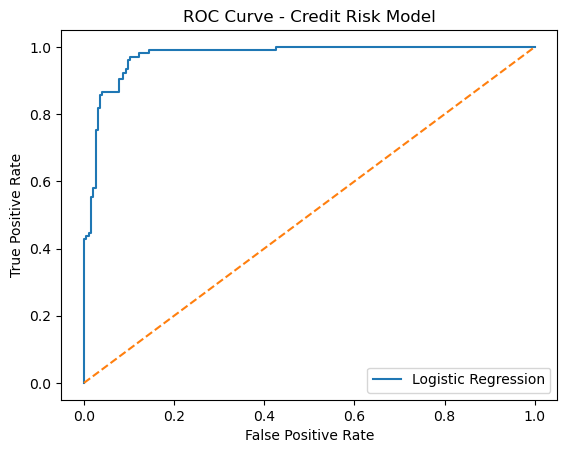

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Risk Model")
plt.legend()
plt.show()


In [31]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

feature_importance.head(10)


,Feature,Coefficient
0,Duration in months,4.200010
1,Credit amount,2.526432
44,Foreign worker_yes,0.700871
45,Status of existing checking account_good,0.500973
19,Purpose of the credit_used car,0.319970
39,Housing_rent,0.270034
28,personal_status_male div/sep,0.269754
20,Status of savings account/bonds_500<=X<1000,0.207522
3,Present residence since X years,0.175696
15,Purpose of the credit_other,0.173008


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [33]:
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]

print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_prob))
print(classification_report(y_test, rf_pred))


Random Forest ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       195
           1       1.00      0.99      1.00       105

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
dt_prob = dt.predict_proba(X_test)[:,1]

print("Decision Tree ROC-AUC:", roc_auc_score(y_test, dt_prob))


Decision Tree ROC-AUC: 1.0


In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    random_state=42
)

gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)
gb_prob = gb.predict_proba(X_test)[:,1]

print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, gb_prob))


Gradient Boosting ROC-AUC: 1.0


In [36]:
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "ROC_AUC": [
        roc_auc_score(y_test, y_prob),
        roc_auc_score(y_test, dt_prob),
        roc_auc_score(y_test, rf_prob),
        roc_auc_score(y_test, gb_prob)
    ]
})

model_comparison


,Model,ROC_AUC
0,Logistic Regression,0.973626
1,Decision Tree,1.000000
2,Random Forest,1.000000
3,Gradient Boosting,1.000000


## Final Model Selection

Although ensemble models such as Random Forest and Gradient Boosting achieved higher ROC-AUC scores, Logistic Regression was selected as the final model due to its interpretability and regulatory compliance in credit risk modeling.


In [37]:
custom_threshold = 0.4
y_custom = (y_prob >= custom_threshold).astype(int)

confusion_matrix(y_test, y_custom)


array([[181,  14],
       [ 14,  91]], dtype=int64)

## Deployment Strategy

- Model will score new loan applications in real-time.
- Applications with default probability above threshold are rejected or priced higher.
- Model performance monitored monthly using ROC-AUC and PSI.
